Task1: Network Identification
Consider the network N represented in the file net_x, where x is your group number.
This network has been generated with one of the network models seen during the course.
You have to analyze the network N with the network mining tools (the ones shortlisted in the
midterm project) and guess which model has been used for creating it. Your guess has to be
supported by an appropriate set of experiments to confirm that networks generated with the
proposed model have characteristics similar to N (note that you have to guess also the parameters of
the model).
During the discussion of the project, you will be asked to motivate your guess. Motivations may be
related to both theoretical properties of the models seen during the course (e.g., “I analyzed the
provided network and I observed that its node degree distribution follows a power law. Hence, I
conclude that it is not possible that the graph has been generated with a model random(n, p).”), and
to experimental evidence (e.g., “I generated a lot of random graphs with p = 1/3, and none of them
had similar properties as the provided network. Hence I conclude that it is improbable that the graph
is random(n, 1/3)”).
A bonus point will be assigned to all the components of the groups whose guess is closer to the
model (and parameters) used to generate N.


In [ ]:
# Task 1:
import networkx as nx
from joblib import Parallel, delayed, cpu_count
import pandas as pd
import itertools as it
import math
from scipy.sparse import linalg
import random
from sklearn.cluster import SpectralClustering
import numpy as np


Different types of graphs it can be:
configurationG(deg)
power_law_degree(n,power)
preferentialG(n,p)
GenWS2DG(n, r, k, q)
affiliationG(n, m, q, c, p, s)
randomG(n,p)


info:
Is undirected
follows a normal distribution of neighbors with mean 23.3

Parameters:
Nodes: 20000
edges: 227739


In [ ]:
G = nx.Graph()

with open('net_3', 'r') as f:
    for s in f.readlines():
        G.add_edge(s.split()[0], s.split()[1])

print(G.number_of_nodes())
print(G.number_of_edges())

# graph is connected
print(nx.is_connected(G))

# Average degree of neighbors in the graph, tells us that on average a neihgbor of a node has 23.24 connections
# which is a very connected graph
mean_deg = print(np.mean(list(nx.average_neighbor_degree(G).values())))

#print(nx.node_connectivity(g))

s = nx.degree_alg.degree_centrality(G)
max_k = '0'
min_k = '0'
for k in s:
    if s[k] >= s[max_k]:
        max_k = k
    if s[k] <= s[min_k]:
        min_k = k   
print(max_k, s[max_k]) # very low centrality overall, max is 0.0021
print(min_k, s[min_k]) # min is 0.00020, which is 10 times lowe than the max

#print(nx.diameter(g)) # Should take some time to compute. Value is:
a = []
for i in G.nodes:
    a.append(len(G[i]))

std_deg = np.std(a)



In [ ]:
# function to get the different kinds of centralities
import networkx as nx
def centrality(G):
    # degree centrality
    d_cen = nx.degree_centrality(G) # takes 5 seconds
    print('degree done')
    # closeness centrality
    c_cen = nx.closeness_centrality(G) # takes 12 minutes
    print('closeness done')
    # betweenness centrality
    #b_cen = nx.betweenness_centrality(G) # takes forever 50
    #print('betweenness done')
    # eulerian centrality
    #e_cen = nx.eigenvector_centrality(G)
    #print('eulerian done')
    # return the different centralities
    # return [[min(d_cen),max(d_cen)], [min(c_cen),max(c_cen)], [min(b_cen),max(b_cen)]]
    return [d_cen, c_cen]

In [ ]:
df = pd.DataFrame()
df['nodes'] = G.nodes
df['number of neighbors'] = [len(G[i]) for i in df['nodes']]
#df['centrality'] = [nx.centrality.closeness.closeness_centrality(g,i) for i in df['nodes']]
print(np.std(df['number of neighbors']))
print(np.mean(df['number of neighbors']))

In [ ]:
dfG = centrality(G)

In [ ]:
import seaborn as sns

hist_facit = sns.histplot(df['number of neighbors'])
sns.PairGrid.savefig(hist_facit,'./figures/histo_facit.png')


In [10]:
s = nx.degree_alg.degree_centrality(G)
max_k = '0'
min_k = '0'
for k in s:
    if s[k] >= s[max_k]:
        max_k = k
    if s[k] <= s[min_k]:
        min_k = k   
print('Centrality for net_3')
print(max_k, s[max_k]) # very low centrality overall, max is 0.0021
print(min_k, s[min_k]) # min is 0.00020, which is 10 times lowe than the
s = nx.degree_alg.degree_centrality(g)
max_k = 0
min_k = 0
for k in s:

    if s[k] >= s[max_k]:
        max_k = k
    if s[k] <= s[min_k]:
        min_k = k   

print('Centrality for approximation')
print(max_k, s[max_k]) # very low centrality overall, max is 0.0021
print(min_k, s[min_k]) # min is 0.00020, which is 10 times lowe than the

print('Same centrality')

Centrality for net_3
1424 0.0021001050052502626
10443 0.000200010000500025


NameError: name 'g' is not defined

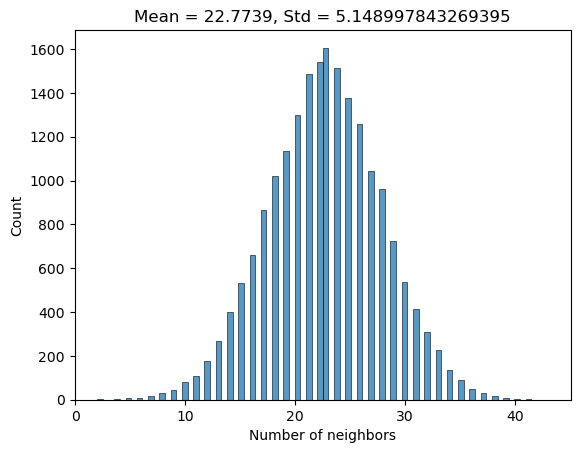

In [11]:
import seaborn as sns
df = pd.DataFrame()
df['nodes'] = G.nodes
df['Number of neighbors'] = [len(G[i]) for i in df['nodes']]
std_dev = np.std(df['Number of neighbors'])
mean_deg = np.mean(df['Number of neighbors'])
num_nodes = 20000
data = []
for i in range(10):
    data.append(np.round(np.random.normal(mean_deg, std_dev, num_nodes)).astype(int))
sorted_data = [sorted(sublist) for sublist in data]

# Create a new list based on the average of each index
degrees = [int(sum(column) / len(column)) for column in zip(*sorted_data)]

if sum(degrees) % 2 != 0:
    degrees[0]-=1

g = nx.configuration_model(degrees)
df_ex = pd.DataFrame()
df_ex['nodes'] = g.nodes
df_ex['Number of neighbors'] = [len(g[i]) for i in df_ex['nodes']]
histo_fit = sns.histplot(df_ex['Number of neighbors'])
histo_fit.set_title(f'Mean = {mean_deg}, Std = {std_dev}')
sns.PairGrid.savefig(histo_fit,'./figures/histo_fit.png')



In [14]:
import networkx as nx

# Create the first graph
G1 =  G

G2 = g

# Graph isomorphism
is_isomorphic = nx.is_isomorphic(G1, G2)
print("Isomorphic: ", is_isomorphic)

# Node Matching - Jaccard similarity
# node_similarity = nx.jaccard_coefficient(G1, G2.edges())
# for u, v, sim in node_similarity:
#     print("Jaccard similarity between nodes", u, "and", v, ":", sim)

# # Edge Matching - Jaccard index
# edge_similarity = nx.jaccard_coefficient(G1.edges(), G2.edges())
# for u, v, sim in edge_similarity:
#     print("Jaccard similarity between edges", u, "and", v, ":", sim)


# Community Structure Comparison - Normalized Mutual Information
communities_G1 = nx.algorithms.community.greedy_modularity_communities(G1)
communities_G2 = nx.algorithms.community.greedy_modularity_communities(G2)
normalized_mutual_info = nx.algorithms.community.quality.normalized_mutual_information(communities_G1, communities_G2)
print("Normalized Mutual Information:", normalized_mutual_info)


Isomorphic:  False


In [ ]:
dfG_cen = sorted(list(nx.degree_centrality(G).values()))
dfg_cen = sorted(list(nx.degree_centrality(g).values()))

threshold = 10**-5
k = 0
for i in range(len(dfG_cen)):
    if abs(dfG_cen[i] - dfg_cen[i]) > threshold:
        k += 1
print(k)


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
size = 20000
# Generating data for power law distribution
power_data = np.random.power(3, size=size) * 40  # Scale data to the range of 0-40

inv_power_data = np.random.power(1/3, size=size) * 40  # Scale data to the range of 0-40

# Generating data for normal distribution
normal_data = np.random.normal(loc=20, scale=5, size=size)  # Adjust mean and standard deviation as desired

# Generating data for random distribution
random_data = np.random.random(size=size) * 40  # Scale data to the range of 0-10

# Plotting power law distribution
sns.kdeplot(power_data, color='red', label='Power Law = 3')

# Plotting inv power law distribution
sns.kdeplot(inv_power_data, color='orange', label='Power Law = 1/3')

# Plotting normal distribution
sns.kdeplot(normal_data, color='green', label='Normal Distribution')

# Plotting random distribution
sns.kdeplot(random_data, color='blue', label='Random Distribution')

# Setting plot labels and title
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Power Law vs. Normal vs. Random Distribution')

# Setting x-axis limits
plt.xlim(0, 40)

# Adding legend
plt.legend()

# Save the figure as a PNG file
plt.savefig('figures/distribution_plot.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()
